# Exercise 3

Let 

$$X=
\begin{pmatrix}
0 & -2\\
1 & 4\\
2 & 1\\
4 & -4\\
4 & -3\\
5 & 6\\
6 & 2
\end{pmatrix}, \,
y=
\begin{pmatrix}
1\\
-1\\
1\\
1\\
-1\\
1\\
-1\\
\end{pmatrix}
$$

be the data matrix and the vector of actual labels for a classification problem, respectively

(a) Represent the feature vectors in a Cartesian plane. Use different shapes to differentiate among classes: little circles for vectors with “-1” label and plus signs for vectors with “1” label.

(b) To separate the data we can use a single-layer perceptron with three neurons (taking the first one as the threshold). Take

$$
w_0=
\begin{pmatrix}
-7\\
2\\
1
\end{pmatrix}
$$

as an initial weight vector. Draw the straight line that corresponds to this vector, in the same plot you made the previous question.

(c) Execute the gradient descent perceptron algorithm for these data and write a table of the weights for subsequent learning epochs.

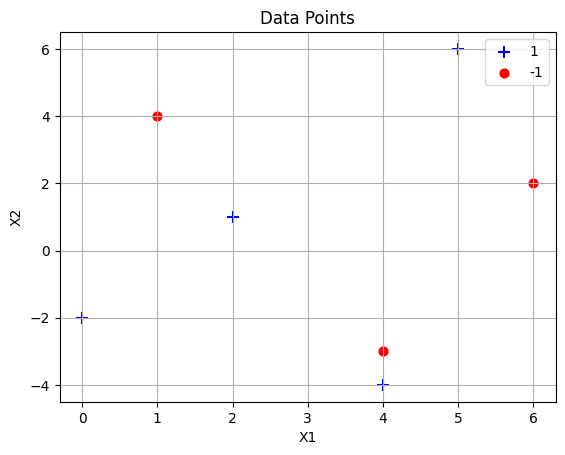

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, -2],
    [1, 4],
    [2, 1],
    [4, -4],
    [4, -3],
    [5, 6],
    [6, 2]
])

y = np.array([1, -1, 1, 1, -1, 1, -1])

fig, ax = plt.subplots()

def plot_data(ax, X, y):
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='+', s=80, label='1')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='o', s=40, label='-1')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Data Points')
    plt.legend()
    plt.grid()

plot_data(ax, X, y)
plt.show()



The figure above shows that the two classes are not linearly separable (we cannot draw a straight line leaving all samples of one class at one side and all samples of the other class at the other side). So it will not be possible to solve it with a single-layer perceptron. Anyway we represent the line corresponding to the initial weight vector as decision boundary.

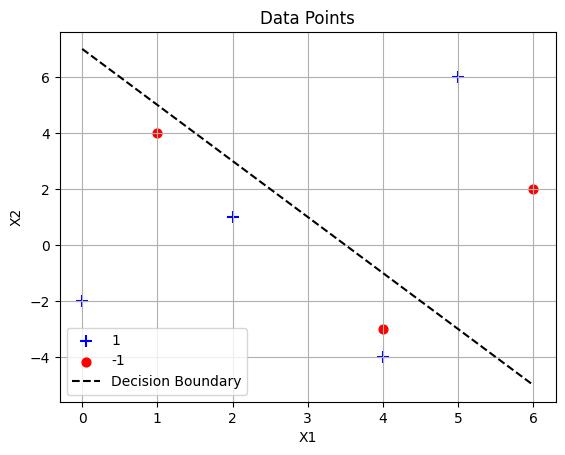

In [19]:
# 7 = 2*x1 + 1*x2
def plot_decision_boundary(ax, weights, threshold, x_range):
    x1 = np.linspace(x_range[0], x_range[1], 100)
    x2 = -(weights[0] * x1 + threshold) / weights[1]
    ax.plot(x1, x2, 'k--', label='Decision Boundary')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    

fig, ax = plt.subplots()

plot_data(ax, X, y)
plot_decision_boundary(ax, weights=[2, 1], threshold=-7, x_range=(0, 6))
plt.show()


Now we implement a gradiend descent optimization of the weights. To do so we need a differentiable loss, like the logistic one

$$L = \sum_i{log(1+e^{y_{i}w^Tx_i})}$$

Epoch  0 | w = [-6.98553862  1.98832221  0.92355153]
Epoch 10 | w = [-6.84292453  1.80397781  0.31859974]
Epoch 20 | w = [-6.71007396  1.56385182 -0.05129905]
Epoch 30 | w = [-6.54994343  1.47440682 -0.1542423 ]
Epoch 40 | w = [-6.38167155  1.43380692 -0.16821929]
Epoch 50 | w = [-6.21331675  1.39711505 -0.16710177]
Epoch 60 | w = [-6.0454191   1.36052469 -0.16333035]
Epoch 70 | w = [-5.87797232  1.32395822 -0.15908678]
Epoch 80 | w = [-5.71098928  1.28747946 -0.15477598]
Epoch 90 | w = [-5.54450367  1.25111392 -0.15047828]
Epoch 100 | w = [-5.37855833  1.21487277 -0.14621294]
Epoch 110 | w = [-5.21320189  1.17876419 -0.14198774]
Epoch 120 | w = [-5.04848833  1.14279647 -0.13780857]
Epoch 130 | w = [-4.8844773   1.10697876 -0.13368122]
Epoch 140 | w = [-4.72123456  1.07132136 -0.12961182]
Epoch 150 | w = [-4.55883248  1.03583586 -0.1256068 ]
Epoch 160 | w = [-4.39735053  1.00053529 -0.12167294]
Epoch 170 | w = [-4.23687579  0.9654343  -0.11781726]
Epoch 180 | w = [-4.07750333  0.930549

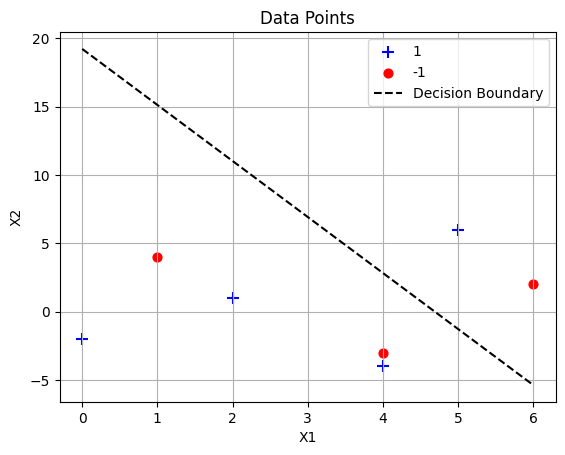

In [27]:
# Logistic sigmoid 
def sigmoid(z): 
    return 1 / (1 + np.exp(-z)) 

# Logistic loss gradient 
def gradient(w, X, y): 
    z = X @ w 
    probs = sigmoid(y * z) 
    grad = -np.sum(((1 - probs) * y)[:, None] * X, axis=0) 
    return grad

# Augment inputs with bias term 
X_aug = np.hstack((np.ones((X.shape[0], 1)), X))

# Initial weights 
w = np.array([-7.0, 2.0, 1.0])

# Gradient descent parameters 
eta = 0.01 
epochs = 1000

# Run gradient descent 
for epoch in range(epochs): 
    grad = gradient(w, X_aug, y) 
    w = w - eta * grad 
    if epoch % 10 == 0: 
        print(f"Epoch {epoch:2d} | w = {w}") 

print("\nFinal weights:", w)

fig, ax = plt.subplots()

plot_data(ax, X, y)
plot_decision_boundary(ax, weights=[w[1], w[2]], threshold=w[0], x_range=(0, 6))
plt.show()

As expected, after the optimization the result is not much better than the initial guess, as we know that a single-layer perceptron is not capable of separating the two classes